In [ ]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [60.0, 90.0, np.int64(7)] before, using random point [52.21948606835049, 81.8577417798237, np.int64(2)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [60.0, 90.0, np.int64(7)] before, using random point [58.3845508438148, 80.72462935061665, np.int64(2)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [60.0, 90.0, np.int64(7)] before, using random point [23.67359527583705, 66.97923026638398, np.int64(6)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [60.0, 90.0, np.int64(7)] before, using random point [20.846921695644387, 60.39088751694851, np.int64(6)]
  warnings.war

Optimized Workout Plan for VO₂ max improvement:
Duration: 60.00 min, Intensity: 90.00% max HR, Frequency: 7 days per week
Maximum fitness (VO₂ improvement score): 385.00


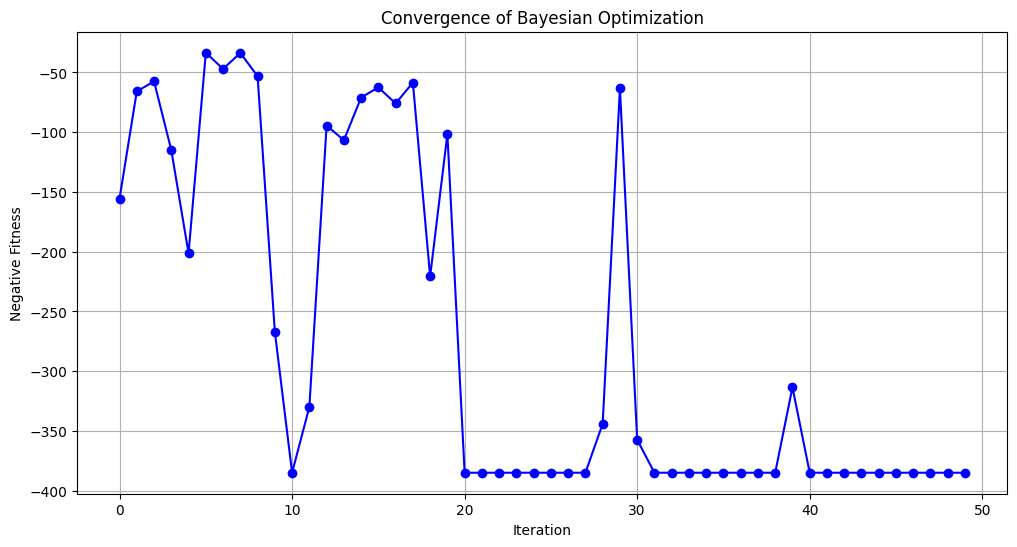

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args

def fitness_function(duration, intensity, frequency):
    if intensity < 70:
        return (0.5 * duration) * frequency
    elif intensity < 80:
        return (0.75 * duration) * frequency
    else:
        return (1.0 * duration - 5) * frequency

space  = [
    Real(20, 60, name='duration'),    # Workout duration in minutes
    Real(60, 90, name='intensity'),     # Intensity as % of max HR
    Integer(1, 7, name='frequency')     # Workouts per week
]

@use_named_args(space)
def objective(**params):
    return -fitness_function(params['duration'], params['intensity'], params['frequency'])

# Run Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, random_state=42)

print("Optimized Workout Plan for VO₂ max improvement:")
print(f"Duration: {res.x[0]:.2f} min, Intensity: {res.x[1]:.2f}% max HR, Frequency: {res.x[2]} days per week")
print(f"Maximum fitness (VO₂ improvement score): {-res.fun:.2f}")

# Plot convergence of the negative fitness value over iterations
plt.figure(figsize=(12, 6))
plt.plot(res.func_vals, marker='o', linestyle='-', color='blue')
plt.xlabel("Iteration")
plt.ylabel("Negative Fitness")
plt.title("Convergence of Bayesian Optimization")
plt.grid(True)
plt.show()
